# Bank Note Authentication Classification

Classify if banknote is fraudulent, as a function of its features

Dataset : https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the dataset**

In [2]:
dataset = pd.read_csv('BankNote_Authentication.csv')

**Exploring the dataset**

In [3]:
dataset.shape

(1372, 5)

In [4]:
dataset.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [5]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
dataset.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [7]:
dataset['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

**Visualizing the count of 'Authentic Bank Notes' from the dataset**

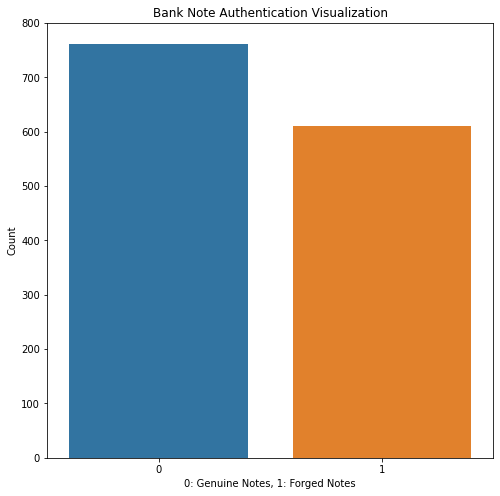

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(x='class', data=dataset)
plt.xlabel('0: Genuine Notes, 1: Forged Notes')
plt.ylabel('Count')
plt.title('Bank Note Authentication Visualization')
plt.show()

In [9]:
dataset.isna().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

**Building Machine Learning Model**

In [10]:
X = dataset.drop('class', axis=1)
Y = dataset['class']

**Splitting the dataset into the Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print('X_train size: {}, X_test size: {}'.format(xtrain.shape, xtest.shape))

X_train size: (1097, 4), X_test size: (275, 4)


**Implementing Random Forest classifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=20)

In [13]:
classifier.fit(xtrain,ytrain)

RandomForestClassifier(random_state=20)

**Predicting the Test set results**

In [14]:
ypred = classifier.predict(xtest)

**Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[155   2]
 [  1 117]]


**Plotting confusion matrix**

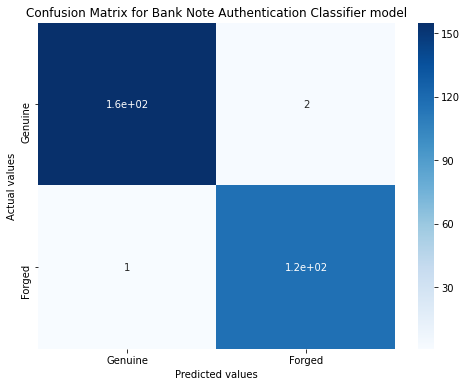

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Bank Note Authentication Classifier model')
plt.show()

**Calculate the Accuracy**

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ypred,ytest)
print('The accuracy for Bank Note Authentication Classifier model is: {}%'.format(score*100))

The accuracy for Bank Note Authentication Classifier model is: 98.9090909090909%


**Predictions**

In [18]:
def predict_note_authentication(variance,skewness,curtosis,entropy):
    variance = float(variance)
    skewness = float(skewness)
    curtosis = float(curtosis)
    entropy = float(entropy)
    
    x = [[variance,skewness,curtosis,entropy]]

    return classifier.predict(x)


In [19]:
# Predictions 1
# Value order : 'variance', 'skewness', 'curtosis', 'entropy', 'class'
if predict_note_authentication(2,3,4,1):
    print('Prediction: Forged')
else:
    print('Prediction: Genuine ')

Prediction: Genuine 


In [20]:
# Predictions 2
# Value order : 'variance', 'skewness', 'curtosis', 'entropy', 'class'
if predict_note_authentication(0,1,-1,0):
    print('Prediction: Forged ')
else:
    print('Prediction: Genuine ')

Prediction: Forged 


**Create a Pickle file using serialization**

In [21]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()